<a href="https://colab.research.google.com/github/LinggarM/News-Category-Classification-using-TF-IDF-Vectorizer-and-Multinomial-Naive-Bayes/blob/main/News_Category_Classification_using_TF_IDF_Vectorizer_and_Multinomial_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [1]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import fetch_20newsgroups

x_train, y_train = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers'), return_X_y = True)
x_test, y_test = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers'), return_X_y = True)

In [2]:
news_data = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers'))
# train_data = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers'))
# test_data = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers'))
x_train, y_train = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers'), return_X_y = True)
x_test, y_test = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers'), return_X_y = True)
# train_data.target

# Data Preparation

In [3]:
import numpy as np
import pandas as pd

df_news = pd.DataFrame(data = {'text' : news_data.data, 'class' : news_data.target})
df_news

,text,class
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,"|>The student of ""regional killings"" alias Dav...",17
3,In article <1993Apr19.034517.12820@julian.uwo....,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,In article <1993Apr22.004728.6736@mtu.edu> cmw...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,In article <1qkgbuINNs9n@shelley.u.washington....,1


In [4]:
labels = []
for i in df_news['class'] :
  labels.append(news_data.target_names[i])

df_news['category'] = labels
df_news

,text,class,category
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,"|>The student of ""regional killings"" alias Dav...",17,talk.politics.mideast
3,In article <1993Apr19.034517.12820@julian.uwo....,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,sci.med
18842,In article <1993Apr22.004728.6736@mtu.edu> cmw...,12,sci.electronics
18843,I just installed a DX2-66 CPU in a clone mothe...,3,comp.sys.ibm.pc.hardware
18844,In article <1qkgbuINNs9n@shelley.u.washington....,1,comp.graphics


In [7]:
df_count = df_news.groupby('category').count()
df_count.reset_index(inplace=True)
df_count = df_count.sort_values(['class'], ascending = False)
df_count

,category,text,class
10,rec.sport.hockey,999,999
15,soc.religion.christian,997,997
8,rec.motorcycles,996,996
9,rec.sport.baseball,994,994
11,sci.crypt,991,991
7,rec.autos,990,990
13,sci.med,990,990
5,comp.windows.x,988,988
14,sci.space,987,987
2,comp.os.ms-windows.misc,985,985


Text(0, 0.5, 'Categories')

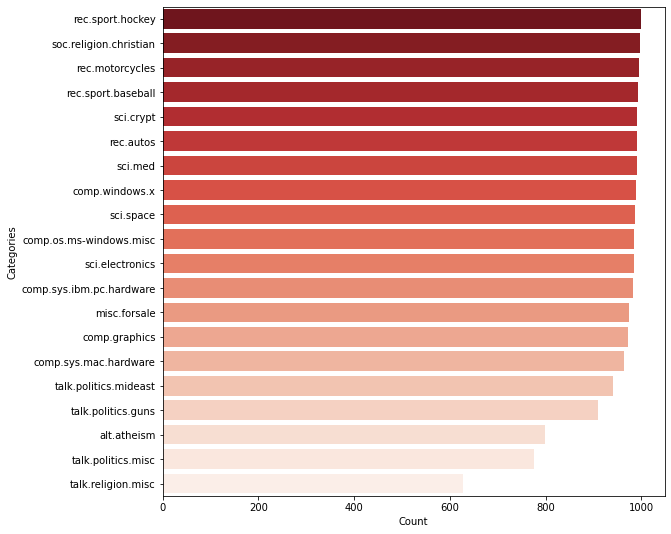

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplots(figsize=(9, 9))
pal = sns.color_palette("Reds", n_colors=20)
pal.reverse()
ax = sns.barplot(x = 'class', y = 'category', data = df_count, palette = pal, order = df_count['category'])
plt.xlabel("Count")
plt.ylabel("Categories")

In [ ]:
counter = df_news.groupby(['category']).count()['class']

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_news['text'].values, df_news['class'].values, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', lowercase = True)
news_vector = vectorizer.fit_transform(x_train)
news_vector_test = vectorizer.transform(x_test)

In [ ]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pickle

pickle.dump(vectorizer, open("/gdrive/My Drive/Upload/Machine Learning/Projects/Text Classification using TF-IDF Vectorizer and Multinomial Naive Bayes/news_vectorizer.sav", "wb"))

In [ ]:
import pickle

vectorizer = pickle.load( open("/gdrive/My Drive/Upload/Machine Learning/Projects/Text Classification using TF-IDF Vectorizer and Multinomial Naive Bayes/news_vectorizer.sav", "rb"))

# Model Training

## Default Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

MNB_model = MultinomialNB()
MNB_model.fit(news_vector, y_train)
y_pred = MNB_model.predict(news_vector_test)

## Multinomial Naive Bayes with Grid Search

In [ ]:
# Dengan Grid Search
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

MNB_model = MultinomialNB()

parameters = {
    'alpha' : [0, 1.0, 2.0, 3.0],
    'fit_prior' : [True, False]
}

grid_search = GridSearchCV(estimator = MNB_model, param_grid = parameters)
grid_search.fit(news_vector, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/nai

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 1.0, 2.0, 3.0],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 0, 'fit_prior': True}

In [ ]:
new_MNB_model = MultinomialNB(alpha = 0, fit_prior = True)

new_MNB_model.fit(news_vector, y_train)
y_pred = new_MNB_model.predict(news_vector_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pickle

pickle.dump(new_MNB_model, open("/gdrive/My Drive/Upload/MNB_Model.sav", "wb"))
new_MNB_model = pickle.load( open("/gdrive/My Drive/Upload/MNB_Model.sav", "rb"))

# Evaluation

## Confussion Matrix

Text(66.47999999999999, 0.5, 'Actual Class')

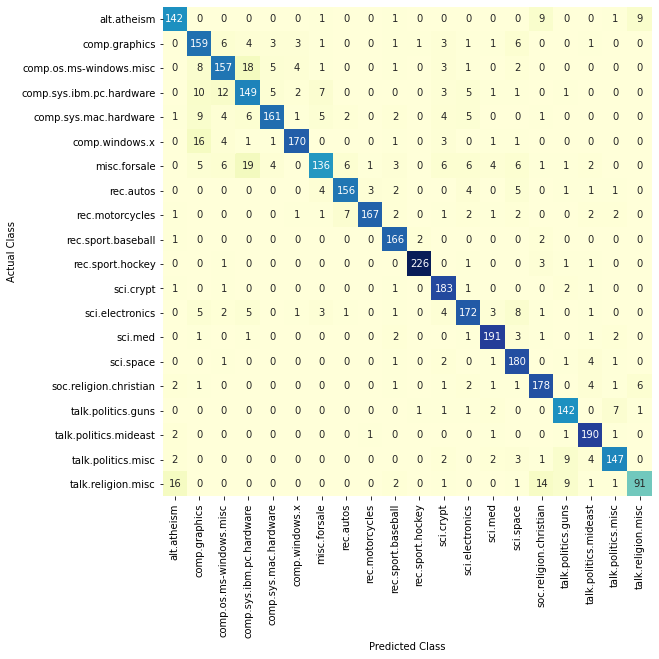

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(conf_mat, square = True, annot=True, fmt = 'd', cmap="YlGnBu", xticklabels = news_data.target_names, yticklabels = news_data.target_names, cbar = False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8655172413793103

## Precision

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average = 'micro')

0.8655172413793103

## Recall

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average = 'micro')

0.8655172413793103

## F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average = 'micro')

0.8655172413793104

# Prediction

In [ ]:
news_sentence = ["NASA is an independent agency of the U.S. federal government responsible for the civilian space program, as well as aeronautics and space research."]
news_sentence = vectorizer.transform(news_sentence)

print(news_data.target_names[new_MNB_model.predict(news_sentence)[0]])

sci.space
